# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [4]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

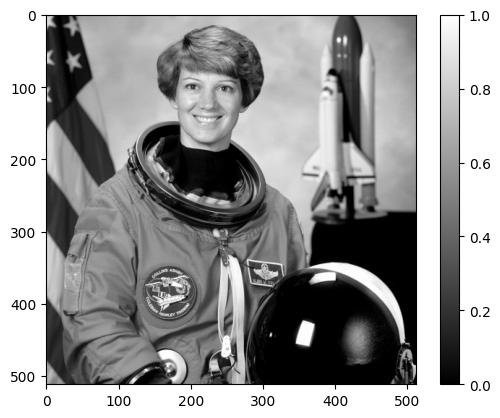

In [5]:
img= plt.imread("data/astronaut.png")
plt.imshow(img, 'gray')
plt.colorbar()

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [49]:
def meanfilter(img_in, size):
        result = numpy.zeros(img_in.shape)
        n = (size - 1) // 2
        for p in numpy.ndindex(img_in.shape):
                neighborhood_sum = 0
                for q in numpy.ndindex(size, size):
                        neighbor_x= min(max(p[0] + q[0] -n,0), img_in.shape[0]-1)
                        neighbor_y= min(max(p[1] + q[1] -n,0), img_in.shape[1]-1)
                        neighborhood_sum += img_in[neighbor_x, neighbor_y]
                result[p] = neighborhood_sum / (size*size)
        return result
    

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

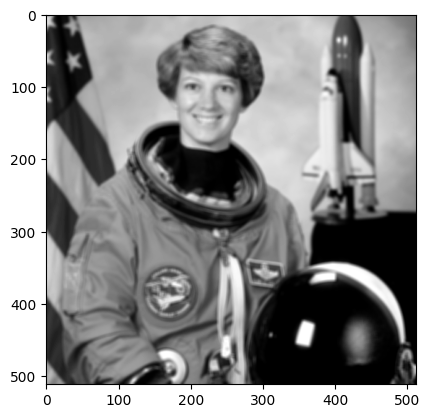

In [50]:
img_filtered = meanfilter(img, 5)
plt.imshow(img_filtered, 'gray')

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

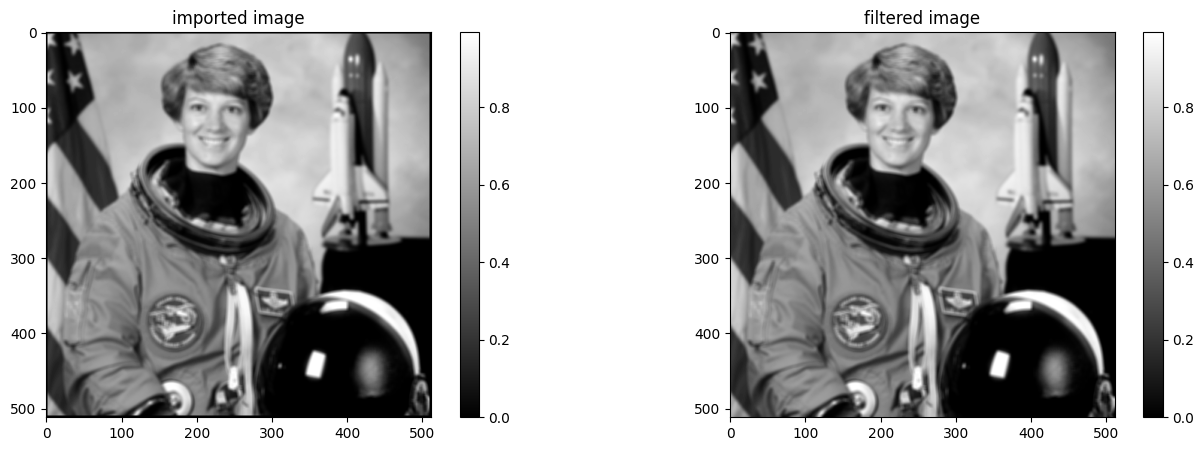

In [8]:
img_2 = plt.imread('data/astronaut_meanfilter5.png')

plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
plt.title('imported image')
plt.imshow(img_2, 'gray')
plt.colorbar()

plt.subplot(1,3,2)
plt.title('filtered image')
plt.imshow(img_filtered, 'gray')
plt.colorbar()


---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [59]:
import statistics

def add_salt_pepper_noise(img_in, prob):
    noisy = img_in.copy()
    rnd = numpy.random.rand(*img_in.shape)

    noisy[rnd < prob / 2] = 0          # Pepper
    noisy[rnd > 1 - prob / 2] = 1    # Salt

    return noisy

def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n= (size-1) // 2
    for p in numpy.ndindex (img_in.shape):
        neighborhood_median = list()
        for q in numpy.ndindex(size, size):
            neighbor_x= min(max(p[0] + q[0] -n,0), img_in.shape[0]-1)
            neighbor_y= min(max(p[1] + q[1] -n,0), img_in.shape[1]-1)
            neighborhood_median.append (img_in[neighbor_x, neighbor_y])
        neighborhood_median.sort()
        m = statistics.median(neighborhood_median)
        result[p]= m
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

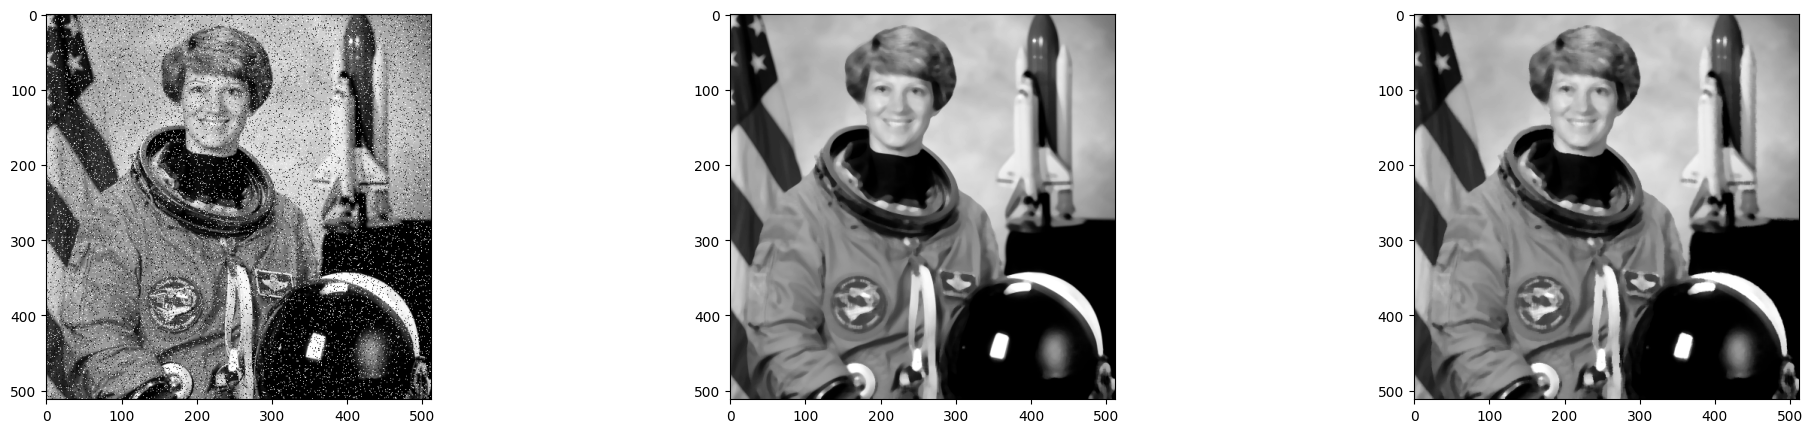

In [60]:
plt.figure(figsize=(25, 5))
plt.subplot(1,3,1)
sp= add_salt_pepper_noise (img, 0.1)
plt.imshow(sp, 'gray')

plt.subplot(1,3,2)
original_filtered = medianfilter(img, 6)
plt.imshow(original_filtered, 'gray')

plt.subplot(1,3,3)
filtered_noise= medianfilter(sp, 6)
plt.imshow(filtered_noise,'gray')

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

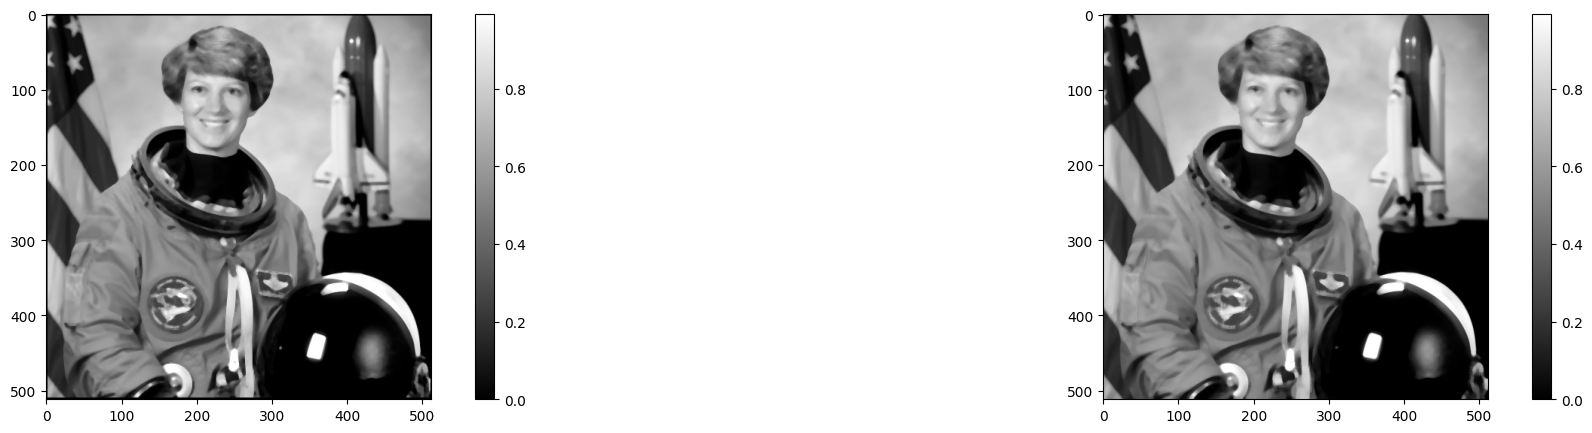

In [57]:
medianfilter5 = plt.imread("data/astronaut_medianfilter5.png")
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.imshow(medianfilter5, 'gray')
plt.colorbar()

plt.subplot(1,2,2)
original_filtered = medianfilter(img, 6)
plt.imshow(original_filtered, 'gray')
plt.colorbar()


---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [10]:
def fastfilter(img_in, size):
    ...

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: